<a href="https://colab.research.google.com/github/carmenbvg/Python_scripts/blob/master/Kalman_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio a partir de entrada de Medium: https://towardsdatascience.com/the-curious-case-of-kalman-filters-f29c3d17b121

In [0]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

#gaussian function

def f(mu, sigma2, x):
  coefficient = 1.0/sqrt(2.0 * pi * sigma2)
  exponential = exp(-0.5*(x-mu)**2/sigma2)
  return (coefficient*exponential)

In Kalman filters, we iterate through measurement (measurement update) which uses Bayes rule, which is nothing else but a product or multiplication and through motion update(prediction) in which we use total probability which is a convolution or simply an addition.
![texto alternativo](https://miro.medium.com/max/1574/1*UZ82HBmsMw31He91DlXhOg.png)
Suppose we multiply two Gaussians, as in Bayes rule, a prior and a measurement probability. The prior has a mean of Mu(μ) and a variance of Sigma square(σ²), and the measurement has a mean of Nu(v) and covariance of r-square(r²).

Then, the new mean, Mu prime(μ′), is the weighted sum of the old means. The Mu(μ) is weighted by r-square(r²), Nu(v) is weighted by Sigma square(σ²), normalized by the sum of the weighting factors. The new variance term would be Sigma square prime(σ²′).

Clearly, the prior Gaussian has a much higher uncertainty, therefore, Sigma square(σ²) is larger and that means the Nu(v) is weighted much much larger than the Mu(μ). So, the mean will be closer to the Nu(v)than the Mu(μ). Interestingly enough, the variance term is unaffected by the actual means, it just uses the previous variances.

![texto alternativo](https://miro.medium.com/max/944/1*J314Aa_L26NAjNCkBrZ3ZA.png)
![texto alternativo](https://miro.medium.com/max/1328/1*MPGzpdwBhafZq553sn7Vnw.png)

In [0]:
def update(mean1, var1, mean2, var2):
  #calculate de new parameters
  new_mean = (var2*mean1 + var1*mean2)/(var2 + var1)
  new_var = 1/(1/var2 + 1/var1)

  return(new_mean, new_var)

A new Mean(μ′) is your old Mean Mu(μ) plus the motion often called u. So, if you move over 10 meters in the x-direction, this will be 10 meters and you knew Sigma square prime(σ²′) is your old Sigma squared(σ²) plus the variance(r²) of the motion Gaussian. This is all you need to know, it’s just an addition. The resulting Gaussian in the prediction step just adds these two things up, mu(μ) plus u and sigma squared(σ²) plus (r²)

In [0]:
def predict(mean1, var1, mean2, var2):
  #calculate the new parameters
  new_mean = mean1 + mean2
  new_var = var1 + var2

  return(new_mean, new_var)

The Filter Pipeline

In [0]:
#Measurements for mu and motions U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

#initial parameters
measurement_sig = 4. 
motion_sig = 2. 
mu = 0.
sig = 10000. 

#Loop through all measurements/motions
for i in range(len(measurements)):
  #measurement update, with uncertainty
  mu, sig = update(mu, sig, measurements[i], measurement_sig)
  print('Update [{}, {}]'.format(mu, sig))
  #motion update with uncertainty
  mu, sig = predict(mu, sig, motions[i], motion_sig)
  print('Predict [{}, {}]'.format(mu, sig))

#Print the final, resultant mu, sig
print('\n')
print('Final result [{}, {}]'.format(mu, sig))

Update [4.998000799680128, 3.9984006397441023]
Predict [5.998000799680128, 5.998400639744102]
Update [5.999200191953932, 2.399744061425258]
Predict [6.999200191953932, 4.399744061425258]
Update [6.999619127420922, 2.0951800575117594]
Predict [8.999619127420921, 4.09518005751176]
Update [8.999811802788143, 2.0235152416216957]
Predict [9.999811802788143, 4.023515241621696]
Update [9.999906177177365, 2.0058615808441944]
Predict [10.999906177177365, 4.005861580844194]


Final result [10.999906177177365, 4.005861580844194]


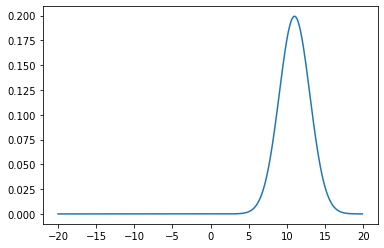

In [0]:
## Print out and display the final, resulting Gaussian 
# set the parameters equal to the output of the Kalman filter result
mu = mu
sigma2 = sig

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)